In [1]:
"""
arj1
Arjun Srivastava
AMATH 301 B
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

45.5

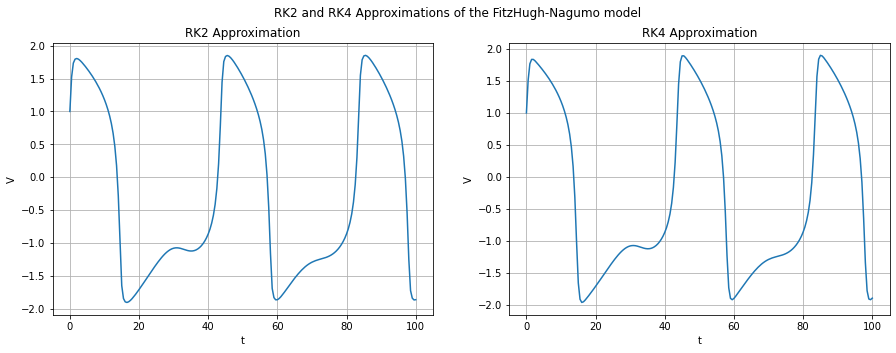

In [25]:
# Problem 1

a = 0.7
b = 1
tau = 12
I = lambda t : (1/10) * (5 + np.sin(np.pi * t / 10))
f = lambda t, sys : np.array([(sys[0] - ((sys[0]**3) / 3) - sys[1] + I(t)), (a + sys[0] - b * sys[1]) / tau])
sys0 = [1, 0]

# Set up plot
fig, axs = plt.subplots(ncols = 2, figsize = (15, 5))
fig.suptitle("RK2 and RK4 Approximations of the FitzHugh-Nagumo model")

# a)

# RK2

dt = 0.5
T = 100
t = np.arange(0, T + dt, dt)
n = t.size

V = np.zeros((2, n))
V[:, 0] = sys0
for k in range(n - 1):
    f1 = f(t[k], V[:, k])
    V[:, k + 1] = V[:, k] + dt * f(t[k] + dt / 2, V[:, k] + (dt / 2) * f1)
    
A1 = V.copy()[0].reshape(1, n)

# Plot voltage

axs[0].plot(t, V[0])
axs[0].set_title("RK2 Approximation")
axs[0].set_xlabel("t")
axs[0].set_ylabel("V")
axs[0].grid()

# b)

A2 = t[np.argmax(A1[0][0:21])]

# c)

A3 = t[np.argmax(A1[0][:101])]

# d) 

# firing rate

A4 = 1/(A3-A2)

# e)

# RK4

dt = 0.5
T = 100
t = np.arange(0, T + dt, dt)
n = t.size

V = np.zeros((2, n))
V[:, 0] = sys0
for k in range(n - 1):
    f1 = f(t[k], V[:, k])
    f2 = f(t[k] + dt / 2, V[:, k] + (dt / 2) * f1)
    f3 = f(t[k] + dt / 2, V[:, k] + (dt / 2) * f2)
    f4 = f(t[k] + dt, V[:, k] + dt * f3)
    V[:, k + 1] = V[:, k] + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    
A5 = V.copy()[0].reshape(1, n)

# Plot voltage

axs[1].plot(t, V[0])
axs[1].set_title("RK4 Approximation")
axs[1].set_xlabel("t")
axs[1].set_ylabel("V")
axs[1].grid()

# f)

A6 = t[np.argmax(A5[0][:21])]

# g)

A7 = t[np.argmax(A5[0][:101])]

# h)

A8 = 1/(A7-A6)

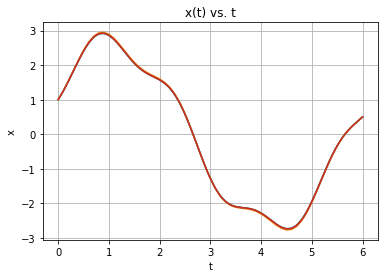

In [3]:
# Problem 2

# True solution
C1 = (.5 + (1/3)*np.cos(24) - (4/3)*np.cos(6)) / np.sin(6)
C2 = 4/3
x_true = lambda t : C1 * np.sin(t) + C2 * np.cos(t) - (1/3) * np.cos(4*t)

# Boundaries
x0 = 1
T = 6
xT = 0.5

# a)

dt = 0.1
t = np.arange(0, T + dt, dt)
n = t.size

v = -2 * np.ones(n - 2)
u = np.ones(n - 3)
A = (1 / dt ** 2) * (np.diag(v) + np.diag(u, 1) + np.diag(u, -1))
A += np.eye(n - 2)

b = 5 * np.cos(4 * t[1:-1])
b[0] = b[0] - x0 / dt ** 2
b[-1] = b[-1] - xT / dt ** 2
b = b.reshape((-1, 1))

A9 = A.copy()
A10 = b.copy()

# b)

x_int = scipy.linalg.solve(A, b)

x = np.zeros(n)
x[0] = x0
x[1:-1] = x_int.reshape(-1)
x[-1] = xT

A11 = x.copy().reshape(61, 1)

plt.title("x(t) vs. t")
plt.xlabel("t")
plt.ylabel("x")

plt.plot(t, x_true(t), t, x)

# c)

# Find error

A12 = np.max(np.abs(x.copy() - x_true(t)))

# d)

dt = 0.01
t = np.arange(0, T + dt, dt)
n = t.size

v = -2 * np.ones(n - 2)
u = np.ones(n - 3)
A = (1 / dt ** 2) * (np.diag(v) + np.diag(u, 1) + np.diag(u, -1))
A += np.eye(n - 2)

b = 5 * np.cos(4 * t[1:-1])
b[0] = b[0] - x0 / dt ** 2
b[-1] = b[-1] - xT / dt ** 2
b = b.reshape((-1, 1))

# e)

x_int = scipy.linalg.solve(A, b)

x = np.zeros(n)
x[0] = x0
x[1:-1] = x_int.reshape(-1)
x[-1] = xT

A13 = x.copy().reshape(601, 1)

plt.title("x(t) vs. t")
plt.xlabel("t")
plt.ylabel("x")

plt.plot(t, x_true(t), t, x)
plt.grid()

# f)

# Find error

A14 = np.max(np.abs(x.copy() - x_true(t)))

# Error ratio
A15 = A12 / A14